In [7]:
from gradcam import*
from ImageNet_labels import *

## 使用预训练的models
## Using pre trained models
model_vgg16 = models.vgg16(pretrained=True)
model_alexnet = models.alexnet(pretrained=True)
model_densenet121 = models.densenet121(pretrained=True)
model_mobilenet_v2 = models.mobilenet_v2(pretrained=True)
model_resnet18 = models.resnet18(pretrained=True)
model_squeezenet = models.squeezenet1_1(pretrained=True)

## 选择哪一层进行可视化操作
## Which layer is selected for visualization
model_vgg16_layers = model_vgg16.features[29]
model_alexnet_layers = model_alexnet.features[11]
model_mobilenet_v2_layers = model_mobilenet_v2.features[18][2]
model_resnet18_layers = model_resnet18.layer4[1].bn2
model_densenet121_layers = model_densenet121.features.norm5
model_squeezenet_layers = model_squeezenet.features[12].expand3x3_activation


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


vgg16 : bullet train, bullet
alexnet : bullet train, bullet
densenet121 : bullet train, bullet
mobilenet_v2 : bullet train, bullet
resnet18 : bullet train, bullet
squeezenet : bullet train, bullet


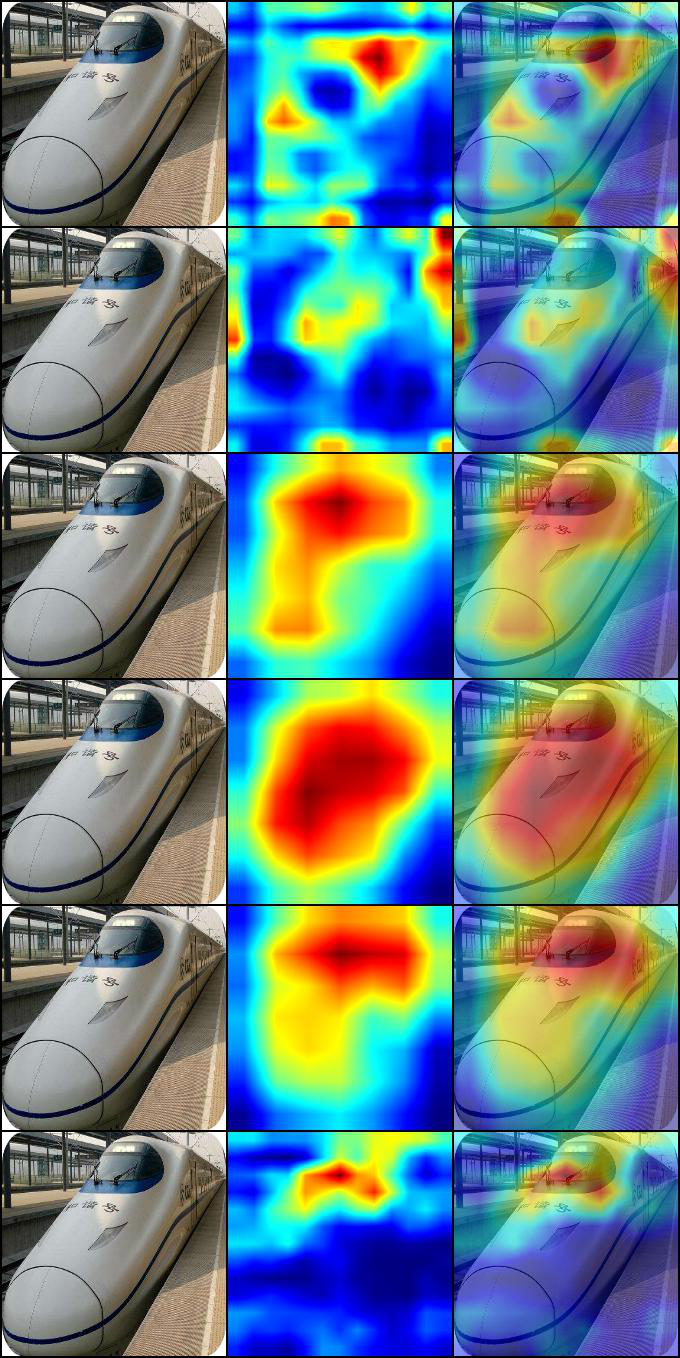

In [8]:
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True
img_path = '../GradCAM_GradCAM++/Pictures/gaotie.jpg'
output_dir = '../GradCAM_GradCAM++/Outputs'
os.makedirs(output_dir, exist_ok=True)
output_name = img_name = 'Test.JPEG'
output_path = os.path.join(output_dir, output_name)
images=[]

## 通过选择GradCAM还是GradCAM++
##By selecting gradcam or gradcam++
select = 'GradCAMPP'

Models_list = {'vgg16':model_vgg16,'alexnet':model_alexnet,'densenet121':model_densenet121,'mobilenet_v2':model_mobilenet_v2,
               'resnet18':model_resnet18,'squeezenet':model_squeezenet}

Layers_list = [model_vgg16_layers,model_alexnet_layers,model_densenet121_layers,model_mobilenet_v2_layers,model_resnet18_layers,model_squeezenet_layers]

for (model_name, model), layer in zip(Models_list.items(), Layers_list):
    if select == 'GradCAM':
        gradcam = GradCAM(model, layer, img_path)
    else:
        gradcam = GradCAMPP(model, layer, img_path)

    img, heatmap, result, index = gradcam()

    images.append(torch.stack([img, heatmap, result], 0))
    print(model_name,':',labels[index.cpu().data.item()])

images = make_grid(torch.cat(images, 0), nrow=3)
save_image(images, output_path)
PIL.Image.open(output_path)